# Checkpoint 1: From Supervised to Reinforcement Learning

## Learning Objectives

By the end of this notebook, you will be able to:

1. **Understand** the key differences between supervised learning and reinforcement learning
2. **Explain** the agent-environment interaction loop
3. **Implement** a simple random agent in the CartPole environment
4. **Collect** and analyze episode rewards and observations
5. **Visualize** the agent's behavior using captured frames

---

## 1. Environment Setup

First, let's install the required packages. We'll use Gymnasium (the maintained fork of OpenAI Gym) for our environments.

In [1]:
# Install required packages
!pip install -q gymnasium[classic-control] numpy matplotlib


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip


In [2]:
# RunPod/Headless setup - Required for running on servers without displays
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

In [3]:
# Import libraries
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print(f"Gymnasium version: {gym.__version__}")
print("All imports successful!")

Gymnasium version: 1.2.3
All imports successful!


---

## 2. Theory: Reinforcement Learning vs Supervised Learning

Before we dive into code, let's understand how reinforcement learning differs from the supervised learning you may already know.

### Comparison Table

| Aspect | Supervised Learning | Reinforcement Learning |
|--------|--------------------|-----------------------|
| **Data** | Fixed dataset with labels | Generated through interaction |
| **Feedback** | Immediate, correct answer provided | Delayed rewards, no "correct" action given |
| **Goal** | Minimize prediction error | Maximize cumulative reward |
| **Learning Signal** | Error gradient from labels | Reward signal from environment |
| **Data Distribution** | i.i.d. (independent, identically distributed) | Non-stationary, depends on policy |
| **Exploration** | Not needed (data is given) | Critical for discovering good strategies |

### Key Insight

In supervised learning, you're given the "right answers" and learn to predict them.  
In reinforcement learning, you must **discover** good actions through trial and error!

### The Agent-Environment Loop

Reinforcement learning is built on a simple but powerful interaction loop:

```
    +-------+     action (a_t)      +-----------+
    |       | ------------------->  |           |
    | AGENT |                       |ENVIRONMENT|
    |       | <-------------------  |           |
    +-------+   state (s_{t+1})     +-----------+
                reward (r_{t+1})
```

**At each timestep t:**
1. The agent observes the current **state** (s_t)
2. The agent selects an **action** (a_t) based on its policy
3. The environment transitions to a new **state** (s_{t+1})
4. The environment provides a **reward** (r_{t+1})
5. The agent uses this experience to improve its policy

**The Goal:** Learn a policy that maximizes the expected sum of rewards over time.

---

## 3. The CartPole Environment

CartPole is a classic control problem where you must balance a pole on a moving cart.

**State Space (4 continuous values):**
- Cart position (-4.8 to 4.8)
- Cart velocity (-Inf to Inf)
- Pole angle (-0.418 rad to 0.418 rad, ~24 degrees)
- Pole angular velocity (-Inf to Inf)

**Action Space (2 discrete actions):**
- 0: Push cart LEFT
- 1: Push cart RIGHT

**Reward:** +1 for every timestep the pole remains upright

**Episode Ends When:**
- Pole angle exceeds +/- 12 degrees
- Cart position exceeds +/- 2.4
- Episode length reaches 500 steps (success!)

In [4]:
# Create the CartPole environment
env = gym.make("CartPole-v1", render_mode="rgb_array")

# Explore the environment
print("=" * 50)
print("CARTPOLE ENVIRONMENT DETAILS")
print("=" * 50)
print(f"\nObservation Space: {env.observation_space}")
print(f"  - Shape: {env.observation_space.shape}")
print(f"  - Low bounds: {env.observation_space.low}")
print(f"  - High bounds: {env.observation_space.high}")
print(f"\nAction Space: {env.action_space}")
print(f"  - Number of actions: {env.action_space.n}")
print(f"  - Action meanings: 0=LEFT, 1=RIGHT")

CARTPOLE ENVIRONMENT DETAILS

Observation Space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
  - Shape: (4,)
  - Low bounds: [-4.8               -inf -0.41887903        -inf]
  - High bounds: [4.8               inf 0.41887903        inf]

Action Space: Discrete(2)
  - Number of actions: 2
  - Action meanings: 0=LEFT, 1=RIGHT


---

## 4. Random Agent Implementation

Let's implement a simple random agent to understand the interaction loop. This agent will:
- Take random actions (no learning!)
- Collect rewards from each episode
- Capture frames for visualization

In [5]:
class RandomAgent:
    """A simple agent that takes random actions."""
    
    def __init__(self, action_space):
        """
        Initialize the random agent.
        
        Args:
            action_space: The action space of the environment
        """
        self.action_space = action_space
    
    def select_action(self, observation):
        """
        Select a random action (ignores the observation).
        
        Args:
            observation: The current state (not used by random agent)
            
        Returns:
            A randomly selected action
        """
        return self.action_space.sample()


def run_episode(env, agent, capture_frames=False):
    """
    Run a single episode with the given agent.
    
    Args:
        env: The Gymnasium environment
        agent: The agent to use for action selection
        capture_frames: Whether to capture RGB frames for visualization
        
    Returns:
        total_reward: Sum of rewards for the episode
        episode_length: Number of steps taken
        frames: List of captured frames (if capture_frames=True)
    """
    observation, info = env.reset()
    total_reward = 0
    episode_length = 0
    frames = []
    
    done = False
    while not done:
        # Capture frame if requested
        if capture_frames:
            frame = env.render()
            frames.append(frame)
        
        # Agent selects an action
        action = agent.select_action(observation)
        
        # Environment step
        observation, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        
        # Accumulate reward
        total_reward += reward
        episode_length += 1
    
    return total_reward, episode_length, frames


print("Random agent and episode runner defined!")

Random agent and episode runner defined!


---

## 5. Running the Random Agent

Let's run our random agent for 10 episodes and analyze its performance.

In [6]:
# Create the agent
agent = RandomAgent(env.action_space)

# Run for 10 episodes
num_episodes = 10
episode_rewards = []
episode_lengths = []
best_frames = []
best_reward = -float('inf')

print("Running random agent for 10 episodes...")
print("=" * 50)

for episode in range(num_episodes):
    # Capture frames only for potential best episode visualization
    reward, length, frames = run_episode(env, agent, capture_frames=True)
    
    episode_rewards.append(reward)
    episode_lengths.append(length)
    
    # Keep track of best episode for visualization
    if reward > best_reward:
        best_reward = reward
        best_frames = frames
    
    print(f"Episode {episode + 1:2d}: Reward = {reward:6.1f}, Length = {length:3d} steps")

print("=" * 50)
print(f"\nStatistics over {num_episodes} episodes:")
print(f"  Mean reward: {np.mean(episode_rewards):.2f} +/- {np.std(episode_rewards):.2f}")
print(f"  Min reward:  {np.min(episode_rewards):.1f}")
print(f"  Max reward:  {np.max(episode_rewards):.1f}")

Running random agent for 10 episodes...
Episode  1: Reward =   27.0, Length =  27 steps
Episode  2: Reward =   37.0, Length =  37 steps
Episode  3: Reward =   28.0, Length =  28 steps
Episode  4: Reward =   24.0, Length =  24 steps
Episode  5: Reward =   20.0, Length =  20 steps
Episode  6: Reward =   16.0, Length =  16 steps
Episode  7: Reward =   21.0, Length =  21 steps
Episode  8: Reward =   22.0, Length =  22 steps
Episode  9: Reward =   12.0, Length =  12 steps
Episode 10: Reward =   14.0, Length =  14 steps

Statistics over 10 episodes:
  Mean reward: 22.10 +/- 7.03
  Min reward:  12.0
  Max reward:  37.0


### Plotting the Results

Let's visualize how our random agent performed across episodes.

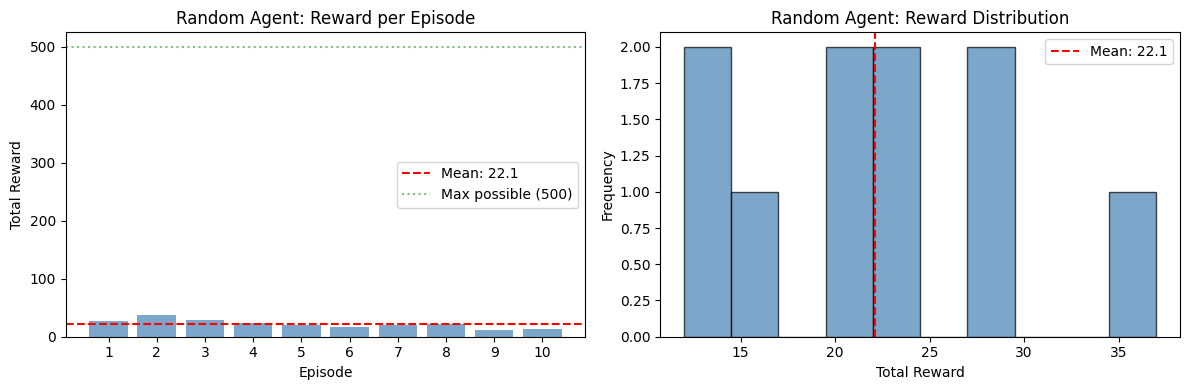


Note: A random agent typically achieves ~20-30 reward on CartPole.
A well-trained agent should reach the maximum of 500!


In [7]:
# Plot episode rewards
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Reward per episode
axes[0].bar(range(1, num_episodes + 1), episode_rewards, color='steelblue', alpha=0.7)
axes[0].axhline(y=np.mean(episode_rewards), color='red', linestyle='--', 
                label=f'Mean: {np.mean(episode_rewards):.1f}')
axes[0].axhline(y=500, color='green', linestyle=':', alpha=0.5,
                label='Max possible (500)')
axes[0].set_xlabel('Episode')
axes[0].set_ylabel('Total Reward')
axes[0].set_title('Random Agent: Reward per Episode')
axes[0].legend()
axes[0].set_xticks(range(1, num_episodes + 1))

# Reward distribution
axes[1].hist(episode_rewards, bins=10, color='steelblue', alpha=0.7, edgecolor='black')
axes[1].axvline(x=np.mean(episode_rewards), color='red', linestyle='--',
                label=f'Mean: {np.mean(episode_rewards):.1f}')
axes[1].set_xlabel('Total Reward')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Random Agent: Reward Distribution')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\nNote: A random agent typically achieves ~20-30 reward on CartPole.")
print("A well-trained agent should reach the maximum of 500!")

---

## 6. Visualizing the Agent's Behavior

Let's look at frames from the best episode to see what the agent is doing.

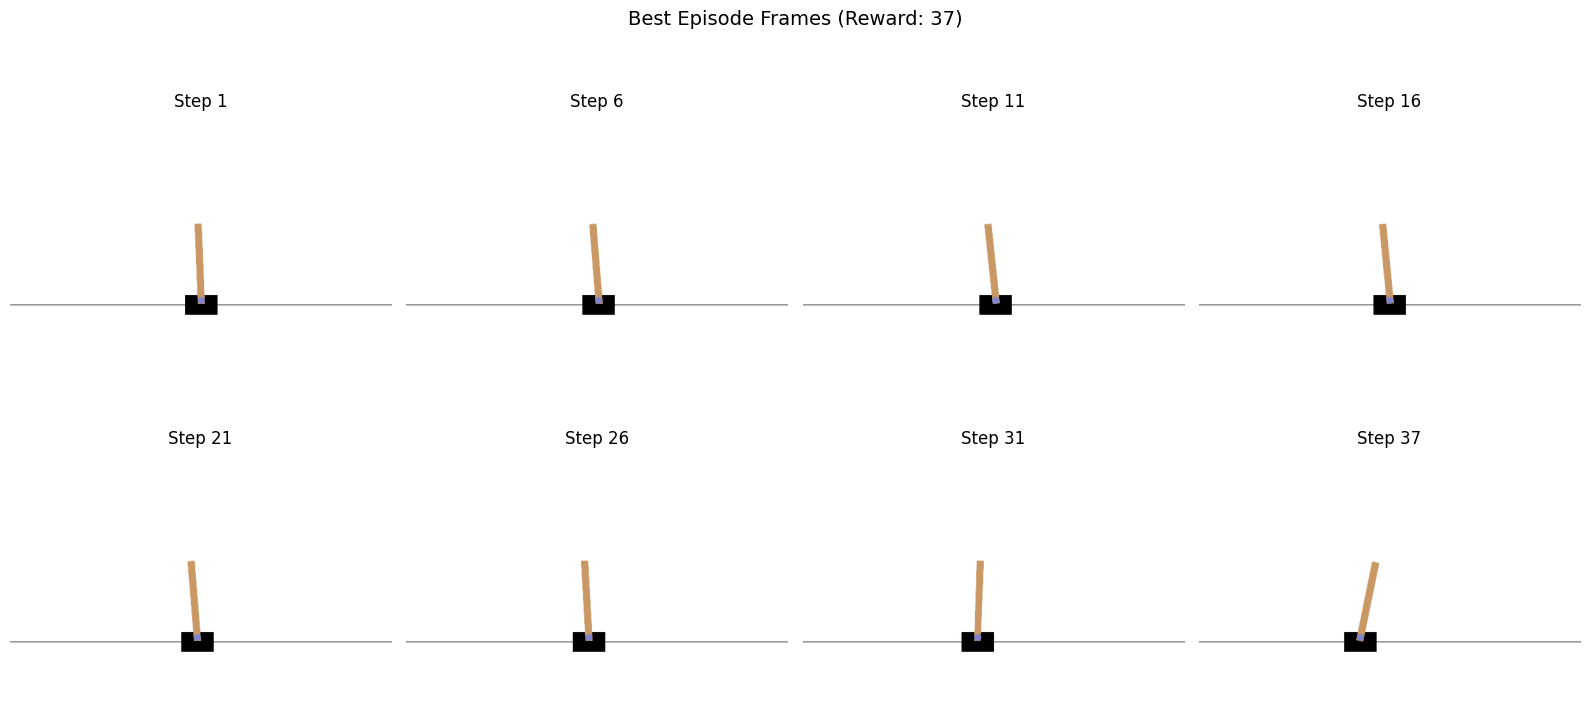


Showing 8 frames from the best episode.
Notice how the pole starts upright and eventually falls over!


In [8]:
# Visualize frames from the best episode
if best_frames:
    # Select frames to display (evenly spaced)
    num_frames_to_show = min(8, len(best_frames))
    indices = np.linspace(0, len(best_frames) - 1, num_frames_to_show, dtype=int)
    
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()
    
    for i, idx in enumerate(indices):
        axes[i].imshow(best_frames[idx])
        axes[i].set_title(f'Step {idx + 1}')
        axes[i].axis('off')
    
    # Hide any unused subplots
    for i in range(num_frames_to_show, len(axes)):
        axes[i].axis('off')
    
    plt.suptitle(f'Best Episode Frames (Reward: {best_reward:.0f})', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    print(f"\nShowing {num_frames_to_show} frames from the best episode.")
    print("Notice how the pole starts upright and eventually falls over!")
else:
    print("No frames captured.")

---

## 7. Exercises

Try these exercises to deepen your understanding:

### Exercise 1: Modify the Random Agent
Create a "biased" random agent that pushes right 70% of the time. Does it perform better or worse?

```python
class BiasedAgent:
    def __init__(self, action_space, right_prob=0.7):
        self.action_space = action_space
        self.right_prob = right_prob
    
    def select_action(self, observation):
        # Your code here
        pass
```

### Exercise 2: Run More Episodes
Run the random agent for 100 episodes. How does the mean reward change? Does the distribution look different?

### Exercise 3: Analyze the State
Modify `run_episode` to collect all observations. Plot how the pole angle changes over time in an episode.

### Exercise 4: Simple Heuristic
Create an agent that uses a simple rule: push left if pole is leaning right, push right if leaning left.

```python
class HeuristicAgent:
    def select_action(self, observation):
        pole_angle = observation[2]  # Index 2 is pole angle
        # Your code here: return 0 or 1 based on pole_angle
        pass
```

---

## 8. Quiz: Test Your Understanding

Answer these questions to check your understanding of RL basics.

### Question 1
In reinforcement learning, the agent receives feedback in the form of:
- A) Correct labels for each action
- B) Gradients computed from a loss function
- C) Reward signals from the environment
- D) Pre-computed optimal actions

<details>
<summary>Click for Answer</summary>
<b>C) Reward signals from the environment</b>
<br>Unlike supervised learning where we get correct labels, RL agents only receive scalar reward signals that indicate how good or bad the outcome was.
</details>

---

### Question 2
Why does a random agent perform poorly on CartPole?
- A) The environment is too complex
- B) It cannot learn from experience to improve its policy
- C) The reward signal is too sparse
- D) CartPole requires continuous actions

<details>
<summary>Click for Answer</summary>
<b>B) It cannot learn from experience to improve its policy</b>
<br>A random agent ignores the state and doesn't learn from rewards. It never improves! To solve CartPole, an agent needs to learn which actions work best in different states.
</details>

---

### Question 3
In the agent-environment loop, what happens after the agent takes an action?
- A) The episode immediately ends
- B) The environment transitions to a new state and provides a reward
- C) The agent receives the correct action from a supervisor
- D) The policy is immediately updated

<details>
<summary>Click for Answer</summary>
<b>B) The environment transitions to a new state and provides a reward</b>
<br>After each action, the environment updates its state according to its dynamics and returns both the new state and a reward signal to the agent.
</details>

---

### Question 4
What is the maximum possible reward in CartPole-v1?
- A) 100
- B) 200
- C) 500
- D) Unlimited

<details>
<summary>Click for Answer</summary>
<b>C) 500</b>
<br>CartPole-v1 truncates episodes after 500 steps. Since the reward is +1 per step, the maximum total reward is 500. An agent that consistently achieves this has "solved" the environment.
</details>

---

## 9. Cleanup

Always close your environments when done to free up resources.

In [9]:
# Clean up resources
env.close()

print("Environment closed successfully!")
print("\n" + "=" * 50)
print("CHECKPOINT 1 COMPLETE!")
print("=" * 50)
print("\nKey Takeaways:")
print("1. RL differs from supervised learning - no labels, only rewards")
print("2. The agent-environment loop is fundamental to RL")
print("3. Random agents establish a baseline but don't improve")
print("4. We need learning algorithms to do better!")
print("\nNext: Checkpoint 2 - MDPs and the Bellman Equation")

Environment closed successfully!

CHECKPOINT 1 COMPLETE!

Key Takeaways:
1. RL differs from supervised learning - no labels, only rewards
2. The agent-environment loop is fundamental to RL
3. Random agents establish a baseline but don't improve
4. We need learning algorithms to do better!

Next: Checkpoint 2 - MDPs and the Bellman Equation
